# Final Project Group 7

# Authors: Leroy Musa, Chan Woo Hwang, Gordon Hamilton, Joaquin Philco

**Original Dataset Source: House Prices 2023 Dataset. gigasheet. https://www.gigasheet.com/sample-data/house-prices-2023-dataset**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv**


# Acquiring Dataset

In [55]:
# Import libraries
# you can install missing library using pip install numpy 
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Download the dataset

url = "https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv"
housing_prices = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
housing_backup = housing_prices

In [56]:
#Show the first 5 values of the dataset before dropping and cleaning it

housing_prices.head() 
#housing_prices.info()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


## Cleaning Dataset


In [57]:
#Cleaning Data

housing_prices = housing_prices.drop('Unnamed: 0', axis=1)
housing_prices.isna().sum() #checks for missing values and returns the individual sum of these ones for each

#Checking for zero values in the data set

print("Number of zeros in the price column:", (housing_prices['price'] == 0).sum())
print("Number of zeros in the baths column:", (housing_prices['baths'] == 0).sum())
print("Number of zeros in the bedrooms column:", (housing_prices['bedrooms'] == 0).sum())
print("Number of zeros in the Area in Marla column:", (housing_prices['Area_in_Marla'] == 0.0).sum())

#show the columns with zeros
zero_rows = housing_prices[housing_prices['bedrooms'] == 0]
print(zero_rows)
zero_rows = housing_prices[housing_prices['Area_in_Marla'] == 0]
print(zero_rows)

#We cannot keep values that have zeros as bedrooms or Area as having a house with 0 bedrooms and 0.0 area does not make sense.
housing_prices = housing_prices[housing_prices['bedrooms'] != 0]
housing_prices = housing_prices[housing_prices['Area_in_Marla'] != 0]

#Double check for zeros again
print("Number of zeros in the price column:", (housing_prices['price'] == 0).sum())
print("Number of zeros in the baths column:", (housing_prices['baths'] == 0).sum())
print("Number of zeros in the bedrooms column:", (housing_prices['bedrooms'] == 0).sum())
print("Number of zeros in the Area in Marla column:", (housing_prices['Area_in_Marla'] == 0.0).sum())

Number of zeros in the price column: 0
Number of zeros in the baths column: 0
Number of zeros in the bedrooms column: 294
Number of zeros in the Area in Marla column: 10
      property_type     price                        location        city  \
230            Flat   6000000             Bahria Town Karachi     Karachi   
341            Flat   5049000                       Scheme 33     Karachi   
369            Flat     75000                             I-8   Islamabad   
1042          House   8500000  Gulzar-e-Quaid Housing Society  Rawalpindi   
1430          House  23000000          Bahria Town Rawalpindi  Rawalpindi   
...             ...       ...                             ...         ...   
93977          Flat   1350000                     DHA Defence      Lahore   
96777          Flat   3500000                       Nazimabad     Karachi   
98223          Flat     65000                            F-11   Islamabad   
98487          Flat   3800000                     Saddar Tow

In [58]:
#Show the dataset after cleaning data
housing_prices.head() 

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


## Exploratory Data Analysis of the Dataset

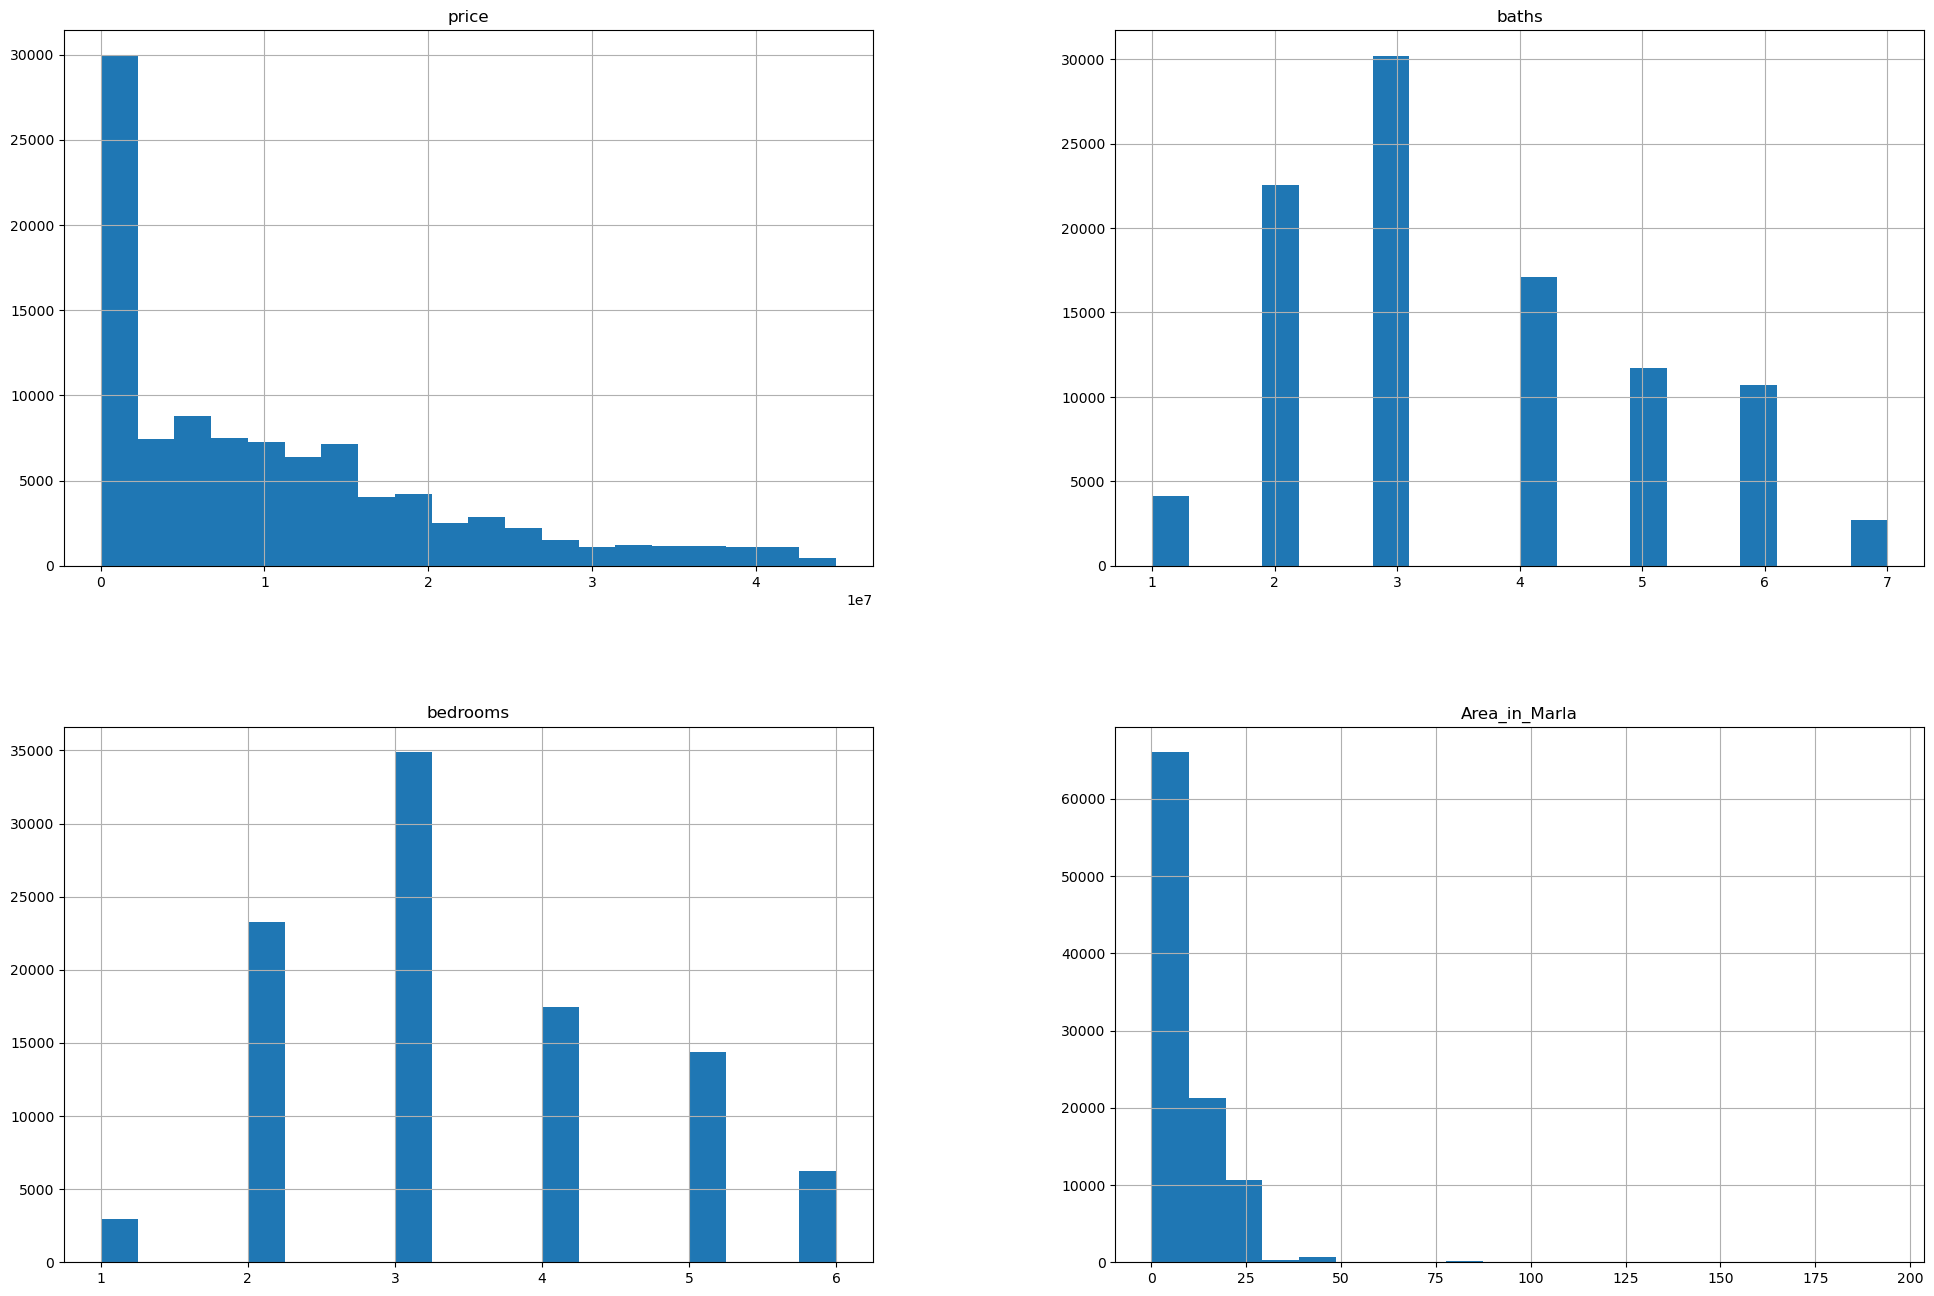

In [59]:
#EDA plots

housing_prices.hist(bins=20, figsize=(24, 16))
plt.show()

c:\Users\joaqu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\joaqu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\joaqu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\joaqu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

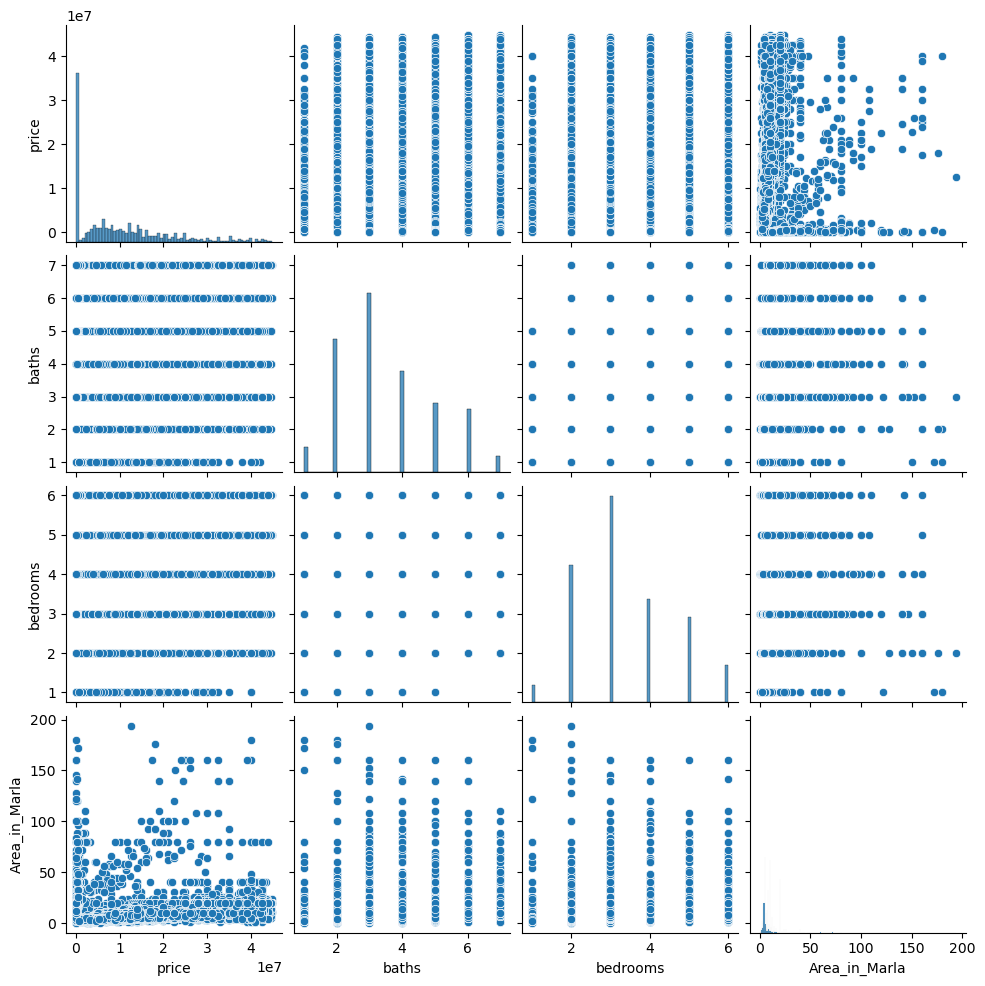

In [60]:
#Check for correlation between attributes using sns.pairplot.
sns.pairplot(housing_prices)

KeyError: 'num__bedrooms'

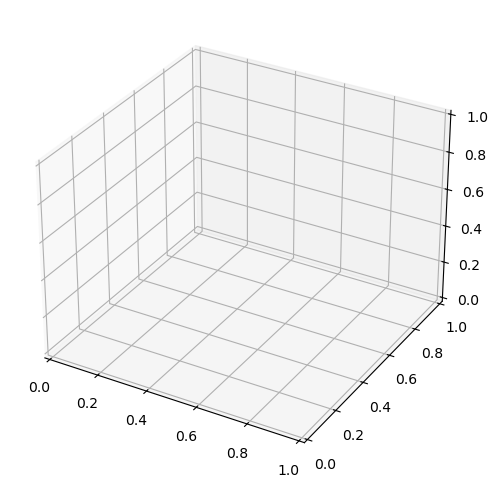

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
x = housing_prices['num__bedrooms']
y = housing_prices['num__baths']
z = housing_prices['num__price']
ax.scatter(x, y, z)

In [ ]:
#corr_matrix["bedrooms"].sort_values(ascending=False)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

housing_prices.drop(labels=['location'], axis = 1, inplace = True)

num_cols = housing_prices.select_dtypes(include='number').columns.to_list()
cat_cols = housing_prices.select_dtypes(exclude='number').columns.to_list()

#create pipelines for numeric and categorical columns

num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())


#use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['price', 'baths', 'bedrooms',
                                  'Area_in_Marla']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['property_type', 'city', 'purpose'])])

In [ ]:
housing_prepared = preprocessing.fit_transform(housing_prices)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
housing_prepared = pd.DataFrame(data=housing_prepared, columns=feature_names)

housing_prepared

,num__price,num__baths,num__bedrooms,num__Area_in_Marla,cat__property_type_Farm House,cat__property_type_Flat,cat__property_type_House,cat__property_type_Lower Portion,cat__property_type_Penthouse,cat__property_type_Room,cat__property_type_Upper Portion,cat__city_Faisalabad,cat__city_Islamabad,cat__city_Karachi,cat__city_Lahore,cat__city_Rawalpindi,cat__purpose_For Rent,cat__purpose_For Sale
0,-0.035265,-1.037916,-1.075507,-0.637182,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.326073,-0.359586,-0.279270,-0.422890,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.574495,1.675402,1.313205,-0.101451,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.107341,0.318743,0.516967,4.184397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.316692,-0.359586,-0.279270,-0.101451,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99494,-0.269787,-0.359586,-0.279270,-0.101451,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99495,-0.147836,0.318743,-0.279270,-0.101451,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99496,0.339972,-0.359586,-0.279270,-0.101451,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99497,0.339972,0.318743,0.516967,0.702145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X = housing_prepared.drop(["num__price"], axis=1)
y = housing_prepared["num__price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)


LinearRegression()

In [ ]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

0.4058723998602059

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-0.40309425, -0.40211205, -0.40910338, -0.39506112, -0.40782501])

In [ ]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: -0.403
Std: 0.005
Min: -0.409
Max: -0.395
